In [111]:
import os
from glob import glob
import shutil


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

import torch
import torch.nn as nn
from torchvision import transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, models

torch.manual_seed(42)

### All in together

In [14]:
# Generating csv file to gather data of images 

def generate_csv(root, img_ext = 'jpg'):
    df = pd.DataFrame(columns = ['path', 'class'])
    for index, label in enumerate(os.listdir(root)):
            links = glob(f"{root}/{label}/*{img_ext}")
            temp_df = pd.DataFrame({'path': links, 'class': np.ones(len(links), dtype='float32')*index})
            df = pd.concat([df, temp_df], axis = 0)
        
    return df

In [35]:
df = pd.DataFrame(columns=['path', 'class'])
root = 'C:\\Users\\ritth\\code\\Data\\datasciencebowl\\train\\train'
labels = os.listdir(root)
labels[:5]



['acantharia_protist',
 'acantharia_protist_big_center',
 'acantharia_protist_halo',
 'amphipods',
 'appendicularian_fritillaridae']

In [139]:
enumerate(os.listdir(root))

In [44]:
glob(f"{root}/*jpg")


[]

In [40]:
pthname = f"{root}/{labels[1]}/*jpg"
pthname

'C:\\Users\\ritth\\code\\Data\\datasciencebowl\\train\\train/acantharia_protist_big_center/*jpg'

In [41]:
links = glob(pthname)
len(links)

13

In [43]:
np.ones(4)*3


array([3., 3., 3., 3.])

In [47]:
pd.DataFrame({'path': links, 'class': np.ones(len(links), dtype='float32')*1})



,path,class
0,C:\Users\ritth\code\Data\datasciencebowl\train...,1.0
1,C:\Users\ritth\code\Data\datasciencebowl\train...,1.0
2,C:\Users\ritth\code\Data\datasciencebowl\train...,1.0
3,C:\Users\ritth\code\Data\datasciencebowl\train...,1.0
4,C:\Users\ritth\code\Data\datasciencebowl\train...,1.0
5,C:\Users\ritth\code\Data\datasciencebowl\train...,1.0
6,C:\Users\ritth\code\Data\datasciencebowl\train...,1.0
7,C:\Users\ritth\code\Data\datasciencebowl\train...,1.0
8,C:\Users\ritth\code\Data\datasciencebowl\train...,1.0
9,C:\Users\ritth\code\Data\datasciencebowl\train...,1.0


In [52]:
data = generate_csv('C:\\Users\\ritth\\code\\Data\\datasciencebowl\\train\\train')
data.shape

(30336, 2)

In [58]:
data.head()


,path,class
0,C:\Users\ritth\code\Data\datasciencebowl\train...,0.0
1,C:\Users\ritth\code\Data\datasciencebowl\train...,0.0
2,C:\Users\ritth\code\Data\datasciencebowl\train...,0.0
3,C:\Users\ritth\code\Data\datasciencebowl\train...,0.0
4,C:\Users\ritth\code\Data\datasciencebowl\train...,0.0


In [108]:
from sklearn.model_selection import train_test_split

train_ds, test_ds = train_test_split(data, test_size=0.2, random_state=0, stratify= data["class"])
train_ds, test_ds = train_ds.reset_index(drop=True), test_ds.reset_index(drop=True)
train_ds.shape, test_ds.shape


((24268, 2), (6068, 2))

In [112]:
train_ds


,path,class
0,C:\Users\ritth\code\Data\datasciencebowl\train...,7.0
1,C:\Users\ritth\code\Data\datasciencebowl\train...,114.0
2,C:\Users\ritth\code\Data\datasciencebowl\train...,0.0
3,C:\Users\ritth\code\Data\datasciencebowl\train...,12.0
4,C:\Users\ritth\code\Data\datasciencebowl\train...,15.0
...,...,...
6063,C:\Users\ritth\code\Data\datasciencebowl\train...,19.0
6064,C:\Users\ritth\code\Data\datasciencebowl\train...,11.0
6065,C:\Users\ritth\code\Data\datasciencebowl\train...,65.0
6066,C:\Users\ritth\code\Data\datasciencebowl\train...,65.0


In [141]:
pth = train_ds.values[1, 0]
pth.split('/')[-1]

'siphonophore_physonect\\14249.jpg'

In [117]:
pth = train_ds.values[1, 0]
pth.split('/')[-1].split("\\")



['siphonophore_physonect', '14249.jpg']

In [127]:
dest_folder = "C:\\Users\\ritth\\code\\Data\\datasciencebowl\\train_new"

In [144]:
for pth in train_ds.values[:, 0]:
        folder_img = pth.split("/")[-1].split("\\")
        folder, img = folder_img[0], folder_img[1]
        label_folder = os.path.join(dest_folder, folder)
        #print(label_folder)
        if not os.path.isdir( label_folder ):              # if the folder does not exist 
            datafoladers = os.mkdir(label_folder)
            print(datafoladers)  

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [142]:
def copy_files(dest_folder, data):
    for pth in data.values[:, 0]:
        folder_img = pth.split("/")[-1].split("\\")
        folder, img = folder_img[0], folder_img[1]
        label_folder = os.path.join(dest_folder, folder)
        print(label_folder)
        # if not os.path.isdir( label_folder ):    # if the folder does not exist 
        #     os.mkdir(label_folder)                 # creating the the folder with containing the labels
        # shutil.copy(pth , label_folder)
        


In [136]:
# for pth in train_ds.values[:, 0]:
#    folder_img = pth.split("/")[-1].split("\\")
#    folder, img = folder_img[0], folder_img[1]
#    label_folder = os.path.join(dest_folder, folder)
#    if not os.path.isdir( label_folder ):    # if the folder does not exist 
#       os.mkdir(label_folder)                 # creating the the folder with containing the labels
#    shutil.copy(pth , label_folder)              # copying images 
   


In [ ]:
for pth in test_ds.values[:, 0]:
   folder_img = pth.split("/")[-1].split("\\")
   folder, img = folder_img[0], folder_img[1]
   label_folder = os.path.join(dest_folder, folder)
   if not os.path.isdir( label_folder ):    # if the folder does not exist 
      os.mkdir(label_folder)                 # creating the the folder with containing the labels
   shutil.copy(pth , label_folder) 

In [51]:
train_transform = transforms.Compose([
                                    transforms.Resize((50, 50)),                                    
                                    transforms.RandomRotation(20),
                                    transforms.RandomResizedCrop(size=28),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize(
                                        mean = 0.5, std = 0.5) 
                                    ])
    
    
test_transform = transforms.Compose([
                                        transforms.Resize((50, 50)),
                                        transforms.CenterCrop(28),
                                        transforms.ToTensor(),
                                        transforms.Normalize(
                                            mean = 0.5, std = 0.5)
        
                                    ])

In [53]:
trainset = datasets.ImageFolder('C:\\Users\\ritth\\code\\Data\\datasciencebowl\\train\\train', transform = train_transform)
len(trainset.classes)

121

In [54]:
trainset

Dataset ImageFolder
    Number of datapoints: 30336
    Root location: C:\Users\ritth\code\Data\datasciencebowl\train\train
    StandardTransform
Transform: Compose(
               Resize(size=(50, 50), interpolation=bilinear, max_size=None, antialias=None)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               RandomResizedCrop(size=(28, 28), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [138]:
from PIL import Image

pil_img = Image.open(data.values[10, 0])


PIL.JpegImagePlugin.JpegImageFile

In [100]:
zeros = torch.zeros(2, 1, 28, 28)
zeros[0] = torch.rand((1, 28, 28))

zeros

tensor([[[[0.8364, 0.4216, 0.0069,  ..., 0.9311, 0.5744, 0.4263],
          [0.8828, 0.0245, 0.2670,  ..., 0.5674, 0.3808, 0.9891],
          [0.4797, 0.2921, 0.9603,  ..., 0.9016, 0.6257, 0.8560],
          ...,
          [0.8390, 0.8794, 0.4300,  ..., 0.9675, 0.2500, 0.5861],
          [0.2831, 0.2839, 0.7308,  ..., 0.6841, 0.4362, 0.7485],
          [0.4087, 0.3292, 0.9327,  ..., 0.4565, 0.3092, 0.2538]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]])

In [110]:
# class PlktDataset(Dataset):
#     def __init__(self, data, transforms):
#         super(PlktDataset, self).__init__()
#         self.data = data
#         self.size = 28
#         self.transform = transforms

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, index):
#         images = torch.zeros(len(self.data), 1, 28, 28)
#         path = data.values[:, 0]
#         label = data.values[:, 1]
#         for idx, pth in enumerate(path):
#             img = Image.open(pth)
#             transfrom_img = self.transform(img)
#             images[idx] = transfrom_img
        
#         return images[index]


# testing_data = PlktDataset(train_ds, train_transform)
# testing_data[0]

IndexError: index 24268 is out of bounds for dimension 0 with size 24268

In [19]:
# train_ds = PlktDataset(data, transforms = train_transform)
# test_ds = PlktDataset(data, transforms = test_transform)

In [20]:



# Creating PT data samplers and loaders:
train_loader = DataLoader(train_ds, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_ds, batch_size = 64, shuffle = False)


In [ ]:
images, labels = iter(trainloader).next()
print(f'image size: {images[0].shape}')
trainset.classes

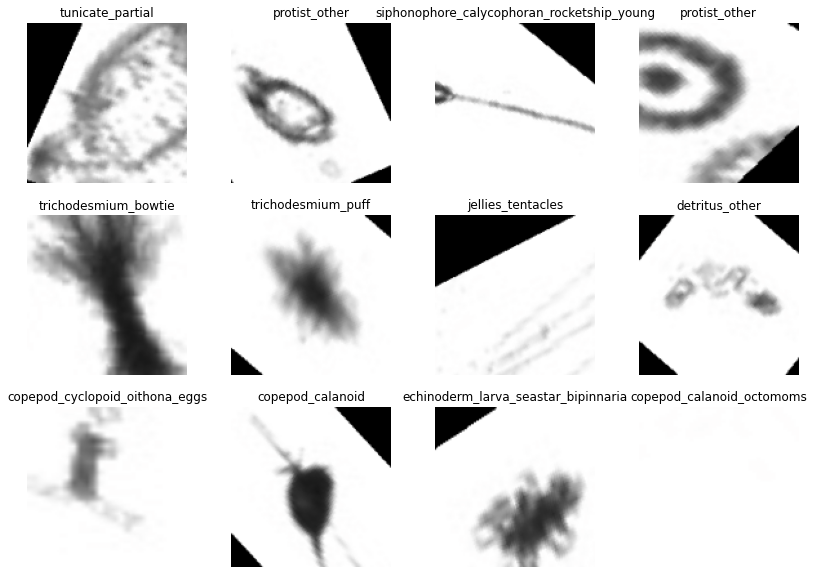

In [22]:
inv_normalize =  transforms.Normalize(
    mean=-1*np.divide([0.485, 0.456, 0.406],[0.229, 0.224, 0.225]),
    std=1/np.array([0.229, 0.224, 0.225])
)

def class_plot(data , classes ,inv_normalize = None,n_figures = 12):
    n_row = int(n_figures/4)
    fig,axes = plt.subplots(figsize=(14, 10), nrows = n_row, ncols=4)
    for ax in axes.flatten():
        idx = np.random.randint(len(data))
        image,label = data[idx]
        label = int(label)
        l = classes[label]
        if(inv_normalize!=None):
            image = inv_normalize(image)
        image = image.numpy().transpose(1,2,0)
        im = ax.imshow(image)
        ax.set_title(l)
        ax.axis('off')
    plt.show()
class_plot(trainset,trainset.classes,inv_normalize)

In [ ]:
import torch.nn.functional as F

In [23]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding='same')
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding='same')
        self.fc1 = nn.Linear(64*7*7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

        
        # dropout to reduce overfitting
        self.dropout = nn.Dropout2d(p=0.20)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        # flatten
        x = x.view(x.shape[0], -1)

        # activation function
        layer1 = self.dropout(F.relu(self.fc1(x)))
        layer2 = self.dropout(F.relu(self.fc2(layer1)))
        out = F.log_softmax(self.fc3(layer2), dim=1)
        
        return out


model = ConvNet()

In [ ]:
# class ConvNet(nn.Module):
#     def __init__(self):
#         super(ConvNet, self).__init__()
#         self.conv1 = nn.Conv2d(3, 224, 5, 3, 2)
#         self.conv2 = nn.Conv2d(224, 128, 5, 2, 2)
#         self.conv3 = nn.Conv2d(128, 64)
#         self.fc1 = nn.Linear(64*43*43, 1256)
#         self.fc2 = nn.Linear(1256, 928)
#         self.fc3 = nn.Linear(928, 756)
#         self.fc4 = nn.Linear(756, 656)
#         self.fc5 = nn.Linear(656, 543)
#         self.fc6 = nn.Linear(543, 453)
#         self.fc7 = nn.Linear(453, 340)
#         self.fc8 = nn.Linear(340, 228)
#         self.fc9 = nn.Linear(228, 121)

        
#         # dropout to reduce overfitting
#         self.dropout = nn.Dropout(p=0.20)
#         self.pool = nn.MaxPool2d(2, 2)


#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.pool(F.relu(self.conv3(x)))
#         #print(x.shape)

#         # flatten
#         x = x.view(x.shape[0], -1)

#         # activation function
#         layer1 = self.dropout(F.relu(self.fc1(x)))
#         layer2 = self.dropout(F.relu(self.fc2(layer1)))
#         layer3 = self.dropout(F.relu(self.fc2(layer2)))
#         layer4 = self.dropout(F.relu(self.fc2(layer3)))
#         layer5 = self.dropout(F.relu(self.fc2(layer4)))
#         layer6 = self.dropout(F.relu(self.fc2(layer5)))
#         layer7 = self.dropout(F.relu(self.fc2(layer6)))
#         layer8 = self.dropout(F.relu(self.fc2(layer7)))
#         out = F.log_softmax(self.fc3(layer8), dim=1)
        
#         return out


# model = ConvNet()

In [24]:
learning_rate = 0.001
epochs = 1

optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
criterion = nn.CrossEntropyLoss()

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
benchmark_accuracy = 0.90

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    running_accuracy = 0
    running_loss = 0

    # training
    for index, (train_patch, (labels, _)) in enumerate(zip(train_loader)):
        

        optimizer.zero_grad()

        # forward pass
        logits = model(train_patch)
        train_preds = torch.argmax(logits.detach(), dim=1)

        # loss
        train_loss = criterion(logits, labels)
        running_loss += train_loss.item()

        # train accuracy
        train_acc = (labels == train_preds).sum() / len(labels)
        running_accuracy += train_acc.item()

        # backward pass
        
        train_loss.backward()
        
        # update paramaters
        
        optimizer.step()

        # mean loss (all batches losses divided by the total number of batches)
    train_losses.append(running_loss / len(train_loader))
    
    # mean accuracies
    train_accuracies.append(running_accuracy / len(train_loader))
    
    # print
    print(f'Train loss: {train_losses[-1] :.4f}')

    # validation
    model.eval()
    with torch.no_grad():
        running_accuracy = 0
        running_loss = 0

        for index, (val_patch, labels) in enumerate(zip(test_loader)):
            
            # logits
            test_logits = model(val_patch)

            # predictions
            test_preds = torch.argmax(test_logits, dim=1)
            
            # accuracy
            test_acc = (labels == test_preds).sum() / len(labels)
            running_accuracy += test_acc.item()

            # loss
            test_loss = criterion(test_logits, labels)
            running_loss += test_loss.item()

        # mean accuracy for each epoch
        test_accuracies.append(running_accuracy / len(test_loader))

        # mean loss for each epoch
        test_losses.append(running_accuracy / len(test_loader))
        # print
        print(f'Test accuracy: {test_accuracies[-1]*100 :.2f}%')
        print('='*100)
        # saving best model
        # is current mean score (mean per epoch) greater than or equal to the benchmark?
        if test_accuracies[-1] > benchmark_accuracy:
            # save model to cpu
            torch.save(model.state_dict(), 'model.pth')

            # update benckmark
            benchmark_accuracy = test_accuracies[-1]

    model.train()


# Plots
x_epochs = list(range(epochs))
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(x_epochs, train_losses, marker='o', label='train')
plt.plot(x_epochs, test_losses, marker='o', label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_epochs, train_accuracies, marker='o', label='train')
plt.plot(x_epochs, test_accuracies, marker='o', label='test')
plt.axhline(benchmark_accuracy, c='grey', ls='--',
            label=f'Best_accuracy({benchmark_accuracy*100 :.2f}%)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('./learning_curve.png', dpi = 200)

plt.show()

Epoch 1/1


ValueError: not enough values to unpack (expected 2, got 1)

In [29]:
output= iter(train_loader).next()
output

tensor([12481, 25553, 27832, 19429, 26858, 14166, 29964, 10260, 10127, 12109,
         7767, 18004, 24318,  9007, 15900, 15303, 20406,  7240, 13990, 10000,
        27800, 11684,  7023, 11697,  9527, 17867, 16917, 11311, 13905, 15842,
         8557, 26359, 27990, 27601,  9448, 16828, 17558,  6668, 13137, 13174,
        30172, 26749, 28612, 20901, 23500, 12063, 17613, 18223, 11400, 25918,
         8534, 25904, 19162, 26841, 26205,  6276, 25308, 21697, 11313,  6886,
        27375, 17926, 12458,  8304])